## Streamling your code

We will:

-extracct data from CSV to create a 'geopandas.GeoDataFrame'
-do more customizations for maps and matplotlib figure
- go over startegios to streamlien ur code!

## data loading 

In [75]:
import os

import pandas as pd
from pandas.api.types import is_string_dtype, is_numeric_dtype
import geopandas as gpd
import matplotlib.pyplot as plt

# display all columns when looking at dataframes
pd.set_option("display.max.columns", None)

In [76]:
# Import power plants data
URL = 'https://raw.githubusercontent.com/carmengg/eds-220-book/refs/heads/main/data/power_plants_epsg4269.csv'
power_plants = pd.read_csv(URL)
power_plants.head()

# Drop first column
power_plants = power_plants.drop(columns = 'Unnamed: 0')

power_plants.head()

,objectid,plant_code,plant_name,utility_id,utility_name,sector_name,street_address,city,county,state,zip,primsource,source_desc,tech_desc,install_mw,total_mw,bat_mw,bio_mw,coal_mw,geo_mw,hydro_mw,hydrops_mw,ng_mw,nuclear_mw,crude_mw,solar_mw,wind_mw,other_mw,source,period,longitude,latitude
0,11570,1,Sand Point,63560,"TDX Sand Point Generating, LLC",Electric Utility,100 Power Plant Way,Sand Point,Aleutians East,Alaska,99661.0,petroleum,"Petroleum = 1.3 MW, Wind = 0.4 MW",Petroleum Liquids; Onshore Wind Turbine;,3.7,1.7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.3,NaN,0.4,NaN,"EIA-860, EIA-860M and EIA-923",202305.0,-160.497222,55.339722
1,11571,2,Bankhead Dam,195,Alabama Power Co,Electric Utility,19001 Lock 17 Road,Northport,Tuscaloosa,Alabama,35476.0,hydroelectric,Hydroelectric = 53 MW,Conventional Hydroelectric,53.9,53.0,NaN,NaN,NaN,NaN,53.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"EIA-860, EIA-860M and EIA-923",202305.0,-87.356823,33.458665
2,11572,3,Barry,195,Alabama Power Co,Electric Utility,North Highway 43,Bucks,Mobile,Alabama,36512.0,natural gas,"Coal = 1118.5 MW, Natural Gas = 1296.2 MW",Conventional Steam Coal; Natural Gas Fired Com...,2569.5,2414.7,NaN,NaN,1118.5,NaN,NaN,NaN,1296.2,NaN,NaN,NaN,NaN,NaN,"EIA-860, EIA-860M and EIA-923",202305.0,-88.010300,31.006900
3,11573,4,Walter Bouldin Dam,195,Alabama Power Co,Electric Utility,750 Bouldin Dam Road,Wetumpka,Elmore,Alabama,36092.0,hydroelectric,Hydroelectric = 224.1 MW,Conventional Hydroelectric,225.0,224.1,NaN,NaN,NaN,NaN,224.1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"EIA-860, EIA-860M and EIA-923",202305.0,-86.283056,32.583889
4,11574,9,Copper,5701,El Paso Electric Co,Electric Utility,651 Hawkins Blvd.,El Paso,El Paso,Texas,79915.0,natural gas,Natural Gas = 63 MW,Natural Gas Fired Combustion Turbine,86.9,63.0,NaN,NaN,NaN,NaN,NaN,NaN,63.0,NaN,NaN,NaN,NaN,NaN,"EIA-860, EIA-860M and EIA-923",202305.0,-106.375000,31.756900


In [77]:
# Import states data
fp = os.path.join('data','tl_2022_us_state','tl_2022_us_state.shp')
states = gpd.read_file(fp)

# simplify col names
states.columns = states.columns.str.lower()
states.head()

,region,division,statefp,statens,geoid,stusps,name,lsad,mtfcc,funcstat,aland,awater,intptlat,intptlon,geometry
0,3,5,54,01779805,54,WV,West Virginia,00,G4000,A,62266456923,489045863,+38.6472854,-080.6183274,"POLYGON ((-77.75438 39.33346, -77.75422 39.333..."
1,3,5,12,00294478,12,FL,Florida,00,G4000,A,138962819934,45971472526,+28.3989775,-082.5143005,"MULTIPOLYGON (((-83.10874 24.62949, -83.10711 ..."
2,2,3,17,01779784,17,IL,Illinois,00,G4000,A,143778515726,6216539665,+40.1028754,-089.1526108,"POLYGON ((-87.89243 38.28285, -87.89334 38.282..."
3,2,4,27,00662849,27,MN,Minnesota,00,G4000,A,206244837557,18937184315,+46.3159573,-094.1996043,"POLYGON ((-95.31989 48.99892, -95.31747 48.998..."
4,3,5,24,01714934,24,MD,Maryland,00,G4000,A,25151771744,6979295311,+38.9466584,-076.6744939,"POLYGON ((-75.75600 39.24607, -75.75579 39.243..."


## CSV to 'geopandas.GeoDataFrame'

The power platns file is a CSV,. Unlinke Shapefiles, 'geopandas' doesn't have a way to extract a geometry column form CSV. SO we need to specificy thsi manually.
We will use the longitude and latitude columsn in the CSV, thesee indicate the logation of the pwoer plants in NAD83 CRS (EPSG:4259).

In [78]:
# create points from latitude and longitude0
points = gpd.points_from_xy(power_plants.longitude,
                   power_plants.latitude)

# create geodataframe                   

In [79]:
power_plants = gpd.GeoDataFrame(power_plants, #data
                geometry = points, # specify geom column
                crs='EPSG:4269') # specificy CRS

<Axes: >

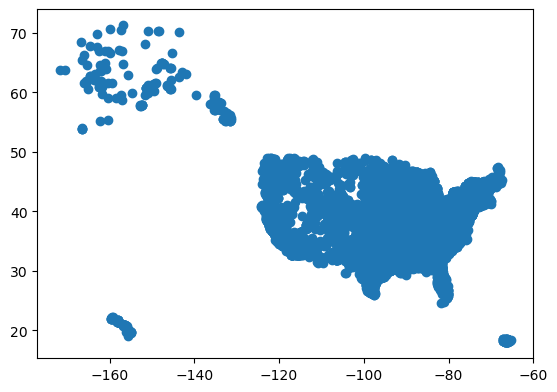

In [80]:
power_plants.plot()

## F-strings
We have printed variables using string concatenations inside 'print()' funciton writing commas between every string and variable we wnat to print.

Example:

In [81]:
print('CRS:', power_plants.crs)

CRS: EPSG:4269


f-strings= formatted string. The simplest syntax for an f-string is :

```
default 
f" some text {replace}"
```
'replace' can be a variable, and expression, a function or a method call.

In [82]:
# Explore CRS
print(f"ellispoid: {power_plants.crs.ellipsoid}")
print(f"datum: {power_plants.crs.datum}")

ellispoid: GRS 1980
datum: North American Datum 1983


In [83]:
print(f"{'Is teh CRS geographic?': <25} {power_plants.crs.is_geographic}")
print(f"{'Is teh CRS projected?': <25} {power_plants.crs.is_projected}")

Is teh CRS geographic?    True
Is teh CRS projected?     False


Explore the tiger shp

In [84]:
states.tail(3)

,region,division,statefp,statens,geoid,stusps,name,lsad,mtfcc,funcstat,aland,awater,intptlat,intptlon,geometry
53,3,5,11,01702382,11,DC,District of Columbia,00,G4000,A,158316184,18709787,+38.9042474,-077.0165167,"POLYGON ((-77.11975 38.93435, -77.11886 38.935..."
54,2,4,19,01779785,19,IA,Iowa,00,G4000,A,144659596400,1086089872,+42.0700243,-093.4933473,"POLYGON ((-95.86095 43.50004, -95.85979 43.500..."
55,4,8,04,01779777,04,AZ,Arizona,00,G4000,A,294365853885,853990728,+34.2039362,-111.6063449,"POLYGON ((-110.75069 37.00301, -110.74193 37.0..."


EPSG:4269


<Axes: >

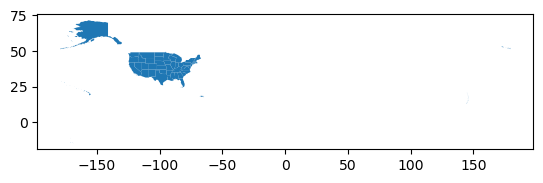

In [85]:
print(states.crs)
states.plot()

## `for` loops 

It can be easier to wrok with codes as numbers instead of strings, lets update teh corresposidng columsn in the states geo=-dataframe 

In [86]:
# exampine if the region, devision, statefp columsn are string or numeric
print(f"region is string dtype? {is_string_dtype(states['region'])}")
print(f"division is string dtype? {is_string_dtype(states['division'])}")
print(f"statefp is string dtype? {is_string_dtype(states['statefp'])}")

region is string dtype? True
division is string dtype? True
statefp is string dtype? True


The inconvenient becasue it repeaste teh same piece of code, only changing the column name
Instead, lets use a for loops to streamline:

In [87]:
code_cols = ['region', 'division', 'statefp']

# check whether codes columns are strings
for column in code_cols:
    print(f"{column} is string dtype? {is_string_dtype(states[column])}")

region is string dtype? True
division is string dtype? True
statefp is string dtype? True


**DRY Code**

DRY = don't repeate yourself = core programming princinple that encourages reducign redundancy and consolidating repeated logic. IF you need to repeate the "same" code more than twice, you probably need a for loop.

## `assert`

the `assert` keyword does nothing if the expression next to it evaluates, the `True` and it raises an `AssertionError` exception and stops your code from running furhter if not.

We use it to integrate tests into our code.

Example

In [88]:
# does nothing fi statement is True
assert 2+2==4

# rasie an error if statement is False
assert 2+2 == 3

AssertionError: 

A workflow for updating the data type of the code columns to be intergers:

for each column in code_columns:
    convert column to numeric
    check if column is numeric using `assert`

In [ ]:
# Update code columns into intergers 
for column in code_cols:
    states[column] = states[column].astype('int')
    assert is_numeric_dtype(states[column])

In [ ]:
states.dtypes

region         int32
division       int32
statefp        int32
statens       object
geoid         object
stusps        object
name          object
lsad          object
mtfcc         object
funcstat      object
aland          int64
awater         int64
intptlat      object
intptlon      object
geometry    geometry
dtype: object

### Data selection.

For this lesson, we want to use only data for the contiguous states. The data covers a bigger extension:


In [ ]:
states.head(3)

,region,division,statefp,statens,geoid,stusps,name,lsad,mtfcc,funcstat,aland,awater,intptlat,intptlon,geometry
0,3,5,54,01779805,54,WV,West Virginia,00,G4000,A,62266456923,489045863,+38.6472854,-080.6183274,"POLYGON ((-77.75438 39.33346, -77.75422 39.333..."
1,3,5,12,00294478,12,FL,Florida,00,G4000,A,138962819934,45971472526,+28.3989775,-082.5143005,"MULTIPOLYGON (((-83.10874 24.62949, -83.10711 ..."
2,2,3,17,01779784,17,IL,Illinois,00,G4000,A,143778515726,6216539665,+40.1028754,-089.1526108,"POLYGON ((-87.89243 38.28285, -87.89334 38.282..."


In [ ]:
states.unique('region')

AttributeError: 'GeoDataFrame' object has no attribute 'unique'

Check-in
1. What are teh unique values for region, division, or state codes in the data?
2. which codes should we select to only keep states in the contiguous US?

In [ ]:
print(states.region.unique())
print(states.statefp.unique())

[3 2 1 4 9]
[54 12 17 27 24 44 16 33 37 50  9 10 35  6 34 55 41 31 42 53 22 13  1 49
 39 48  8 45 40 47 56 15 38 21 78 69 66 23 36 32  2 60 26  5 28 29 30 20
 18 72 46 25 51 11 19  4]


Remove region 9 or division 0
Hawaii and Alaska have codes 2 and 15

<Axes: >

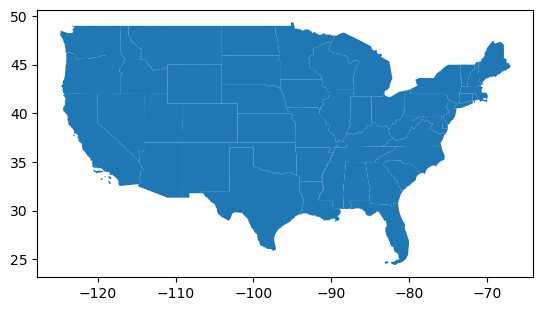

In [ ]:
# Select contiguous US States
# Select contiguous US states
contiguous = states[(states.region!=9) & (~states.statefp.isin([2,15]))]
contiguous.plot()

<Axes: >

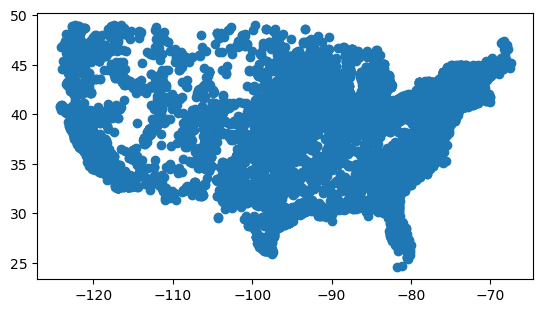

In [ ]:
power_plants.head(5)
power_plants_cont = power_plants[(~power_plants.state.isin(["Alaska", "Hawaii", "Puerto Rico"]))]
power_plants_cont.plot()

### Plotting
Before plotting data we need to make sure they are in teh same CRS.

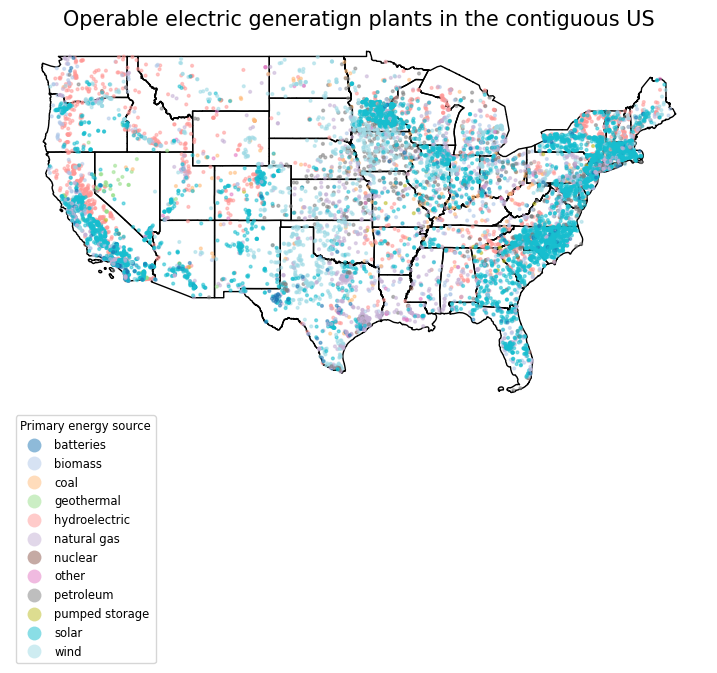

In [ ]:
contiguous.crs
fig, ax = plt.subplots(figsize=(9,5)) # Update fig size

# remove the axis for a clenar map
ax.axis('off')

# Title
ax.set_title('Operable electric generatign plants in the contiguous US',
            fontsize=15)

# Add states
contiguous.plot(ax = ax,
                color = 'none')

# add power plants colored by energy source
power_plants_cont.plot(ax = ax,
                 column = 'primsource',
                 legend = True,
                 markersize=4,
                 cmap='tab20',
                 alpha=0.5,
                 legend_kwds={
                    'title':'Primary energy source',
                    'title_fontsize': 'small',
                    'fontsize': 'small',
                    'loc': 'upper left',
                    'bbox_to_anchor': (0,0)
                 })
                 
plt.show()                

## `for` with `zip`

Often we need to iterate simultaneously over two lists (or iterables)

`zip()` is a Python function that allows you to combine two lists so that you can iterate over their elements in pairs. When used
in a `for` loop it allows you to process elements of each list together.

In [ ]:
# Iterate over a single list
numbers = [1, 2, 3]
for num in numbers:
        print(num+1)

2
3
4


In [ ]:
# Iterate over two lists in pairs using zip()
letters = ['a', 'b', 'c']
for num, letter in zip(numbers, letters):
    print(num+1, letter)

2 a
3 b
4 c


A common situation when code gets repeaged is when creating subplots

Text(0.5, 1.0, 'This is axis 2')

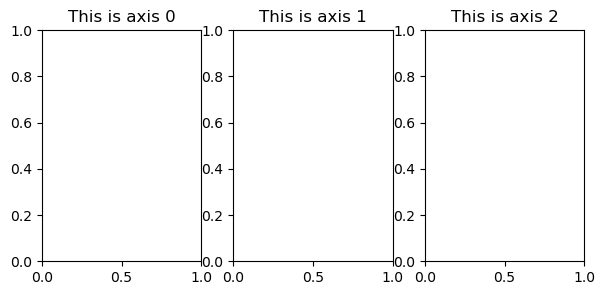

In [ ]:
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(7,3))

axes[0].set_title('This is axis 0')
axes[1].set_title('This is axis 1')
axes[2].set_title('This is axis 2')

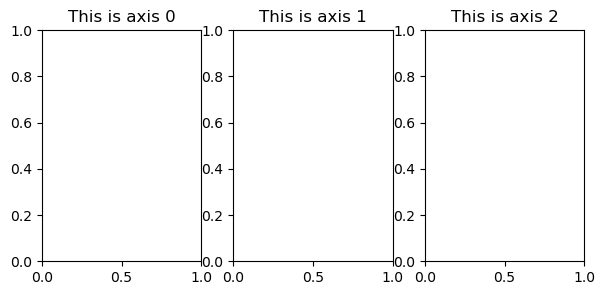

In [91]:
# Use zip ot create the same subpolots and avoid redundancy

fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(7,3))

for ax, i in zip(axes, [0,1,2]):
    ax.set_title(f'This is axis {i}')

In [93]:
ca_power_plants = power_plants[(power_plants.state.isin(["California"]))]

In [103]:
ca_power_plants
top_sources = ['solar', 'natural gas', 'hydroelectric']
print(top_sources)

['solar', 'natural gas', 'hydroelectric']


In [104]:
ca_pp = power_plants[power_plants['state'] == 'California'].copy()

In [105]:
ca_boundary = states[states['name'] == "California"].copy()

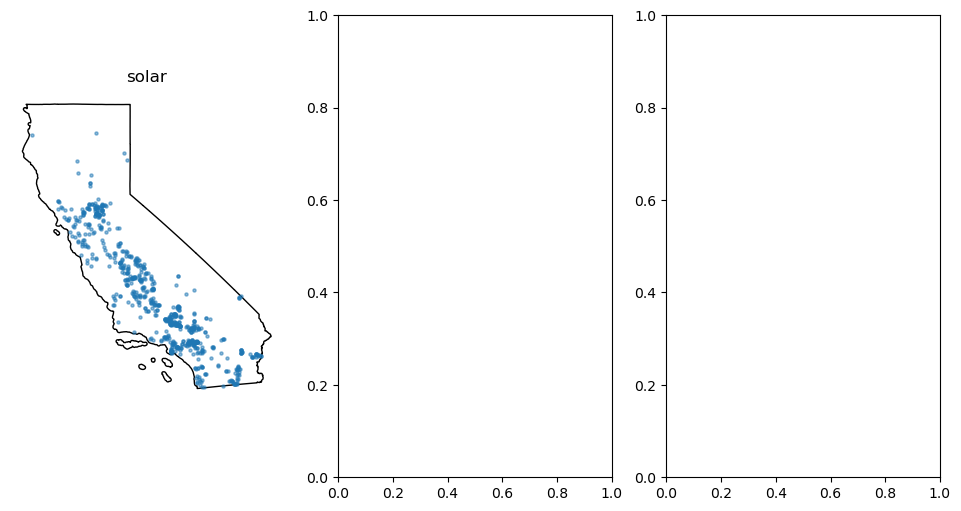

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

In [111]:
fig, ax = plt.subplots(figsize=(12,6), nrows=1, ncols=3)

for ax, i in zip(ax, top_sources): 

    ax.set_title(i)

    ax.axis('off')

    ca_boundary.plot(ax=ax,
                    color='none',
                    edgecolor= 'black'
                    )
    ca_power_plants[ca_power_plants['primsource'] == i].plot(ax=ax,
                                                            markersize=5,
                                                            alpha=0.5)
    plt.show()                                                                        
